### Load packages

In [1]:
suppressMessages(library(fable))
suppressMessages(library(forecast))
suppressMessages(library(tidyverse))
suppressMessages(library(tsibble))
suppressMessages(library(scales))
suppressMessages(library(feasts))

In [2]:
# Default Directory to Save the Plots
plot_prefix <- 'plots/w01_'

save_graph <- function(nm, hgt=3, wdt=5, prefix=plot_prefix){
    ggsave(paste(plot_prefix, nm, sep=''), height=hgt, width=wdt)
}


### Read in a simple .csv file
Look at the first 5 rows

In [3]:
df <- read.csv('data/UNRATENSA.csv')
df %>% head()

,DATE,UNRATENSA
,<chr>,<dbl>
1,1948-01-01,4.0
2,1948-02-01,4.7
3,1948-03-01,4.5
4,1948-04-01,4.0
5,1948-05-01,3.4
6,1948-06-01,3.9


### Convert to a tsibble - time series object
This creates a formal time index versus a data frame without a time orientiation.

In [4]:
ts_df <- df %>%
mutate(DATE = yearmonth(as.Date(DATE))) %>%
as_tsibble(index=DATE)

ts_df %>% head()

DATE,UNRATENSA
<mth>,<dbl>
1948 Jan,4.0
1948 Feb,4.7
1948 Mar,4.5
1948 Apr,4.0
1948 May,3.4
1948 Jun,3.9


### Create a simple model and generate potential forecasts
Use data pre-COVID for modeling, pull simulations from the model.

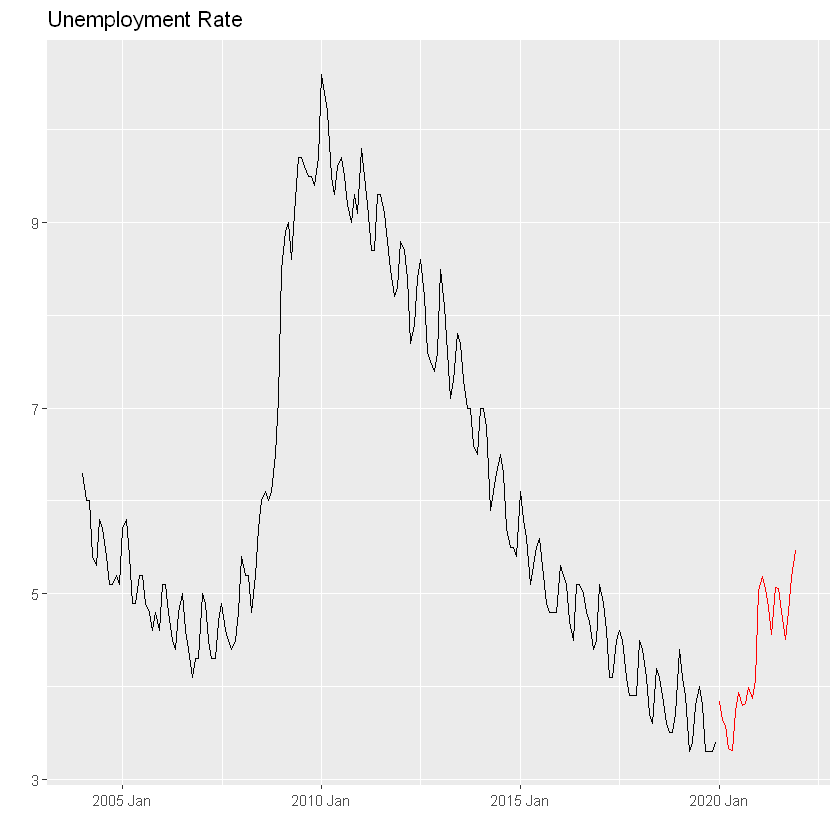

In [5]:
mdl <- ts_df %>%
filter_index(~'2019 Dec') %>%
model(ETS(UNRATENSA))

fcst <- mdl %>% forecast(h='2 years')

set.seed(4564)
future1 <- mdl %>% generate(h='2 years', times=1)
future2 <- mdl %>% generate(h='2 years', times=1)
future3 <- mdl %>% generate(h='2 years', times=1)
future4 <- mdl %>% generate(h='2 years', times=1)
future5 <- mdl %>% generate(h='2 years', times=1)
future6 <- mdl %>% generate(h='2 years', times=1)


ts_df %>% filter_index('2004 Jan'~'2019 Dec') %>%
autoplot(UNRATENSA) +
geom_line(data=future1, aes(x=DATE, y=.sim), colour='red') +
labs(title='Unemployment Rate', x='', y='')

save_graph('unemployment_rate.png')


### Add Another Future to the Plot

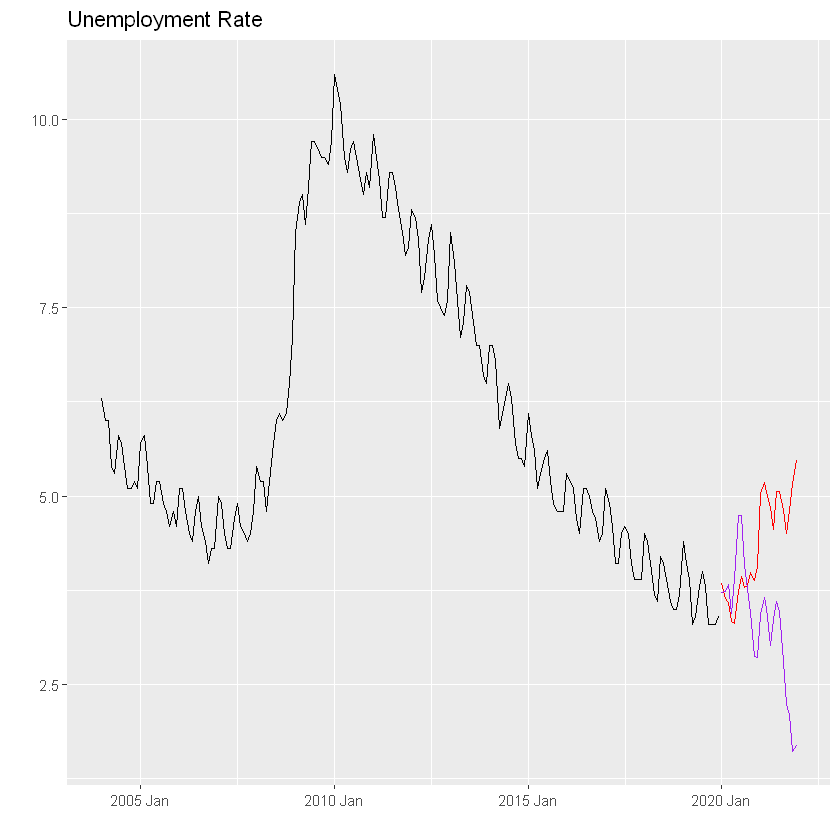

In [6]:
ts_df %>% filter_index('2004 Jan'~'2019 Dec') %>%
autoplot(UNRATENSA) +
geom_line(data=future1, aes(x=DATE, y=.sim), colour='red') +
geom_line(data=future2, aes(x=DATE, y=.sim), colour='purple') +
labs(title='Unemployment Rate', x='', y='')

save_graph('unemployment_rate_2futures.png')


### Add Even More Futures

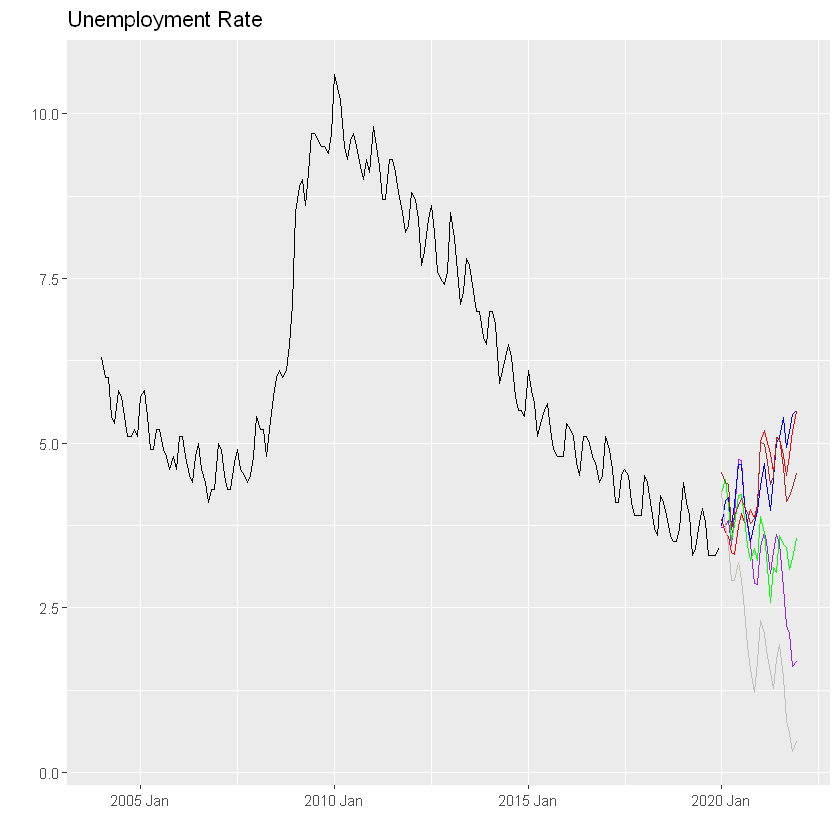

In [7]:
ts_df %>% filter_index('2004 Jan'~'2019 Dec') %>%
autoplot(UNRATENSA) +
geom_line(data=future1, aes(x=DATE, y=.sim), colour='red') +
geom_line(data=future2, aes(x=DATE, y=.sim), colour='purple') +
geom_line(data=future3, aes(x=DATE, y=.sim), colour='green') +
geom_line(data=future4, aes(x=DATE, y=.sim), colour='blue') +
geom_line(data=future5, aes(x=DATE, y=.sim), colour='grey') +
geom_line(data=future6, aes(x=DATE, y=.sim), colour='brown') +
labs(title='Unemployment Rate', x='', y='')

save_graph('unemployment_rate_many_future.png')


### Plot the Actual Forecasts

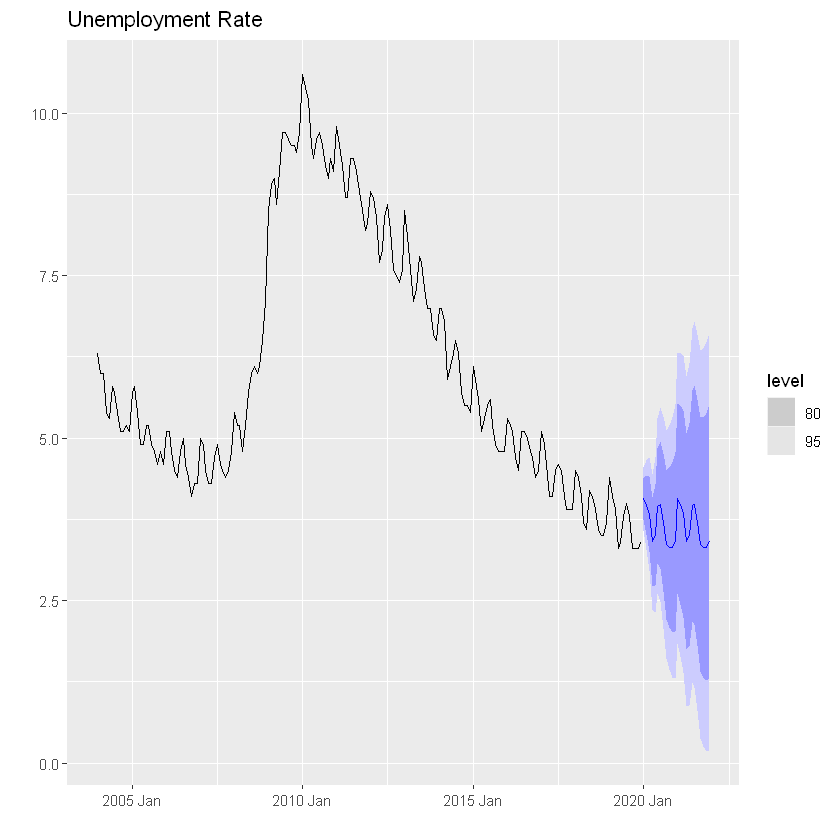

In [8]:
ts_df %>% filter_index('2004 Jan'~'2019 Dec') %>%
autoplot(UNRATENSA) +
autolayer(fcst) +
labs(title='Unemployment Rate', x='', y='')

save_graph('unemployment_rate_forecast.png')

### Compare with Realizations

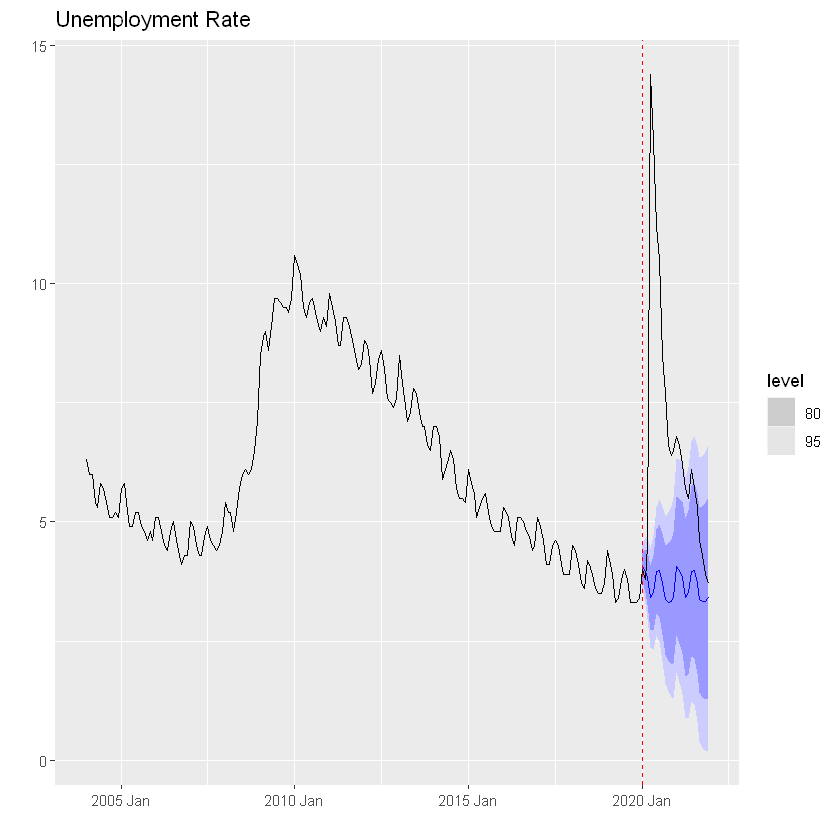

In [9]:
autoplot(fcst) +
autolayer(ts_df %>% filter_index('2004 Jan'~'2021 Dec'), UNRATENSA) +
guides(colour='none') +
geom_vline(xintercept = as.Date('2020-01-01'), color='red', lty=2) +
labs(title='Unemployment Rate', x='', y='')

save_graph('unemployment_rate_forecast_overlay.png')
